# `CUSTOMER CHURN PREDICTION`

## `Business Understanding`

### `Business Objective:` 

The primary objective of Vodafone Corporation is to reduce customer churn, a prevalent issue across many industries, especially in the telecommunications sector. The ultimate goal is to predict the likelihood of a customer di


### `Key Performance Indicateors (KPIs):`  
for this objective includes the churn rate, customer lifetime value, and customer retention rate.


### `Understanding the Current Situation:` 
Currently, `Vodafone` has access to a wealth of customer data, supplied by the business development unit and the marketing and sales team. This data will be leveraged to build machine learning models capable of predicting customer churn. The current churn rate serves as a benchmark for measuring the effectiveness of the implemented strategies.

### `Data Mining Goals:` 
The aim of data mining in this context is `to develop a classification model that can predict whether a customer is likely to churn`. This is a supervised learning problem where the model will be trained on the provided data and then used to make predictions on new data. The model should also be able to identify the key features or indicators that lead to customer churn. The accuracy, precision, recall, and F1 score of the model can serve as KPIs for this goal.

### `Project Plan:` 
The project plan involves several steps. First, the data will be prepared for analysis, which  includes `cleaning the data, handling missing values, and encoding  variables`. Next, appropriate machine learning algorithms will be selected for model construction. The model will then be trained and tested using the prepared data. The model’s performance will be evaluated using suitable metrics, such as `accuracy, recall, precision, and F1 score`. Finally, the model will be deployed for predicting customer churn. The key indicators identified by the model can then be used to devise effective strategies for customer retention. The impact of these strategies can be measured using KPIs such as the `reduction in churn rate and increase in customer retention rate`.

By aligning these steps with the overall business strategy, the company can ensure a data-driven approach to tackling customer churn, ultimately leading to improved customer retention and business growth.

### `Data for the Project:`

The data for this projects has been divided into 3. The first 2 data sets are for training and evaluation the machine learning model while the last data set is for testing the model. The first 3000 records of the dataset can be found in a database which will have to be accessed remotely. The second part of the data is hosted on this GitHub Repository in a file called LP2_Telco-churn-second-2000.csv. Whiles the final data set needed for this project can be found in OneDrive.



### `Target:`

`Churn` — Whether the customer churned or not (Yes, No)

### `Numeric Features:`

+ `Tenure` — Number of months the customer has been with the company
+ `MonthlyCharges` — The monthly amount charged to the customer
+ `TotalCharges` — The total amount charged to the customer


### `Categorical Features:`

+ `CustomerID`
+ `Gender` — M/F
+ `SeniorCitizen` — Whether the customer is a senior citizen or not (1, 0)
+ `Partner` — Whether customer has a partner or not (Yes, No)
+ `Dependents` — Whether customer has dependents or not (Yes, No)
+ `PhoneService` — Whether the customer has a phone service or not (Yes, No)
+ `MulitpleLines` — Whether the customer has multiple lines or not (Yes, No, No Phone Service)
+ `InternetService` — Customer’s internet service type (DSL, Fiber Optic, None)
+ `OnlineSecurity` — Whether the customer has Online Security add-on (Yes, No, No Internet Service)
+ `OnlineBackup` — Whether the customer has Online Backup add-on (Yes, No, No Internet Service)
+ `DeviceProtection` — Whether the customer has Device Protection add-on (Yes, No, No Internet Service)
+ `TechSupport` — Whether the customer has Tech Support add-on (Yes, No, No Internet Service)
+ `StreamingTV` — Whether the customer has streaming TV or not (Yes, No, No Internet Service)
+ `StreamingMovies` — Whether the customer has streaming movies or not (Yes, No, No Internet Service)
+ `Contract` — Term of the customer’s contract (Monthly, 1-Year, 2-Year)
+ `PaperlessBilling` — Whether the customer has paperless billing or not (Yes, No)
+ `PaymentMethod` — The customer’s payment method (E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))



### `Analytical Questions`
__Question 1__ : `Churn Rate Over Time`: How does the churn rate vary over different time periods (e.g., months or years)? Are there any seasonal trends in churn rate?

**Question 2** : `Churn Rate by Contract Type`: What is the churn rate for different contract types (e.g., monthly, yearly, or bi-yearly)? Visualize the churn rate distribution among different contract types.

**Question 3**: `Distribution of Monthly Charges`: What is the distribution of monthly charges among customers who churned versus those who did not churn? Are there any significant differences in the distribution?

**Question 4**: `Customer Tenure vs. Churn Rate`: How does the tenure of customers relate to the churn rate? Plot the churn rate against the tenure of customers.

**Question 5**: `Impact of Additional Services`: Visualize the churn rate for customers who have additional services like Online Security, Online Backup, etc. How do these services affect customer retention?

**Question 6**: `Churn Rate by Payment Method`: Is there any correlation between the payment method chosen by customers and their likelihood to churn? Visualize the churn rate for different payment methods.

**Question 7**: `Gender and Churn Rate`: Explore if there's any significant difference in churn rate based on gender. Visualize the churn rate distribution for male and female customers.

**Question 8**: `Customer Demographics and Churn`: Investigate if senior citizens, customers with partners, or customers with dependents are more likely to churn. Visualize the churn rate for these demographics.

**Question 9**: `Correlation Matrix`:Is there any correlation between these numeric features and the target variable, churn?

**Question 10**: What are the most common payment methods?

**Question 11**: What types of contracts are most common among customers?

## `Data Understanding`

In [1]:
# loading of packages

import pyodbc     
from dotenv import dotenv_values   
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')



### `Importing Data`

#### Load first training dataset from MS SQL server DB

In [8]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('../.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("ServerName")
database = environment_variables.get("DB_Name")
username = environment_variables.get("DB_User")
password = environment_variables.get("DB_PWD")

In [9]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [10]:
# Connect to the database
connection = pyodbc.connect(connection_string)

In [11]:
# select data from from table
query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

df = pd.read_sql(query, connection)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [15]:
# exporting imported data to CSV

df.to_csv('../datasets/raw_datasets/first.csv', index=False)

#### Loading second training datasets from Github source

In [17]:
# Load from GitHub repository source

# URL of the raw csv file in the GitHub repository
url = 'https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/main/LP2_Telco-churn-second-2000.csv'

# Use pandas to load the csv file
df_2 = pd.read_csv(url)

In [19]:
df_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [18]:
# exporting imported data to CSV

df_2.to_csv('../datasets/raw_datasets/second.csv', index=False)

#### load test datasets in from a Onedrive Repository
The file is an excel file that was downloaded and saved in the test folder of the datasets direcotor


In [25]:

# Use pandas to load the Excel file
df_test = pd.read_excel('../datasets/test_dataset/Telco-churn-last-2000.xlsx')
df_test.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [27]:
# exporting imported data to CSV

df_test.to_csv('../datasets/test_dataset/df_test.csv', index=False)

## `Exploratory Data Analysis(EDA) On Trainind Datasets`



### Load, compare and Merge Dataframes

Before performing this, there is a need to merge the training datasets. before this is done, we have to check if columns are the same. we will start by importing the datasets and then compare them

In [28]:
#load the first training dataset from csv

df1= pd.read_csv('../datasets/raw_datasets/first.csv')
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [29]:
#load the second training dataset from csv

df2= pd.read_csv('../datasets/raw_datasets/second.csv')
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [30]:
# Check if the column names of df1 and df2 are the same
if set(df1.columns) == set(df2.columns):
    print("Both DataFrames have the same columns.")
else:
    print("The column names of the DataFrames are different.")


Both DataFrames have the same columns.


In [32]:
#merging the dataframes
# Concatenate the DataFrames along axis=0 (along rows)
concatenated_df = pd.concat([df, df2])

# Display the concatenated DataFrame
concatenated_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

we keep a copy of the merged dataframe so that we can always refer to it instead of starting from the top

In [38]:
#export merged data to csv

concatenated_df.to_csv('../datasets/raw_datasets/merged_df.csv', index= False)

### Beginning the EDA

In [3]:
#load and read merged data

df=pd.read_csv('../datasets/raw_datasets/merged_df.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


In [4]:
#readin the last 5 rows of the dataframe
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
5042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
#reading the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


the data above looks fine except for the `TotalCharges` which is object instead of a float datatype. this will be handled during data preprocessing 

#### checking for number of Unique Values in each Column


In [6]:
df.nunique()

customerID          5043
gender                 2
SeniorCitizen          2
Partner                4
Dependents             4
tenure                73
PhoneService           4
MultipleLines          5
InternetService        3
OnlineSecurity         5
OnlineBackup           5
DeviceProtection       5
TechSupport            5
StreamingTV            5
StreamingMovies        5
Contract               3
PaperlessBilling       4
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4870
Churn                  4
dtype: int64

#### Check for Duplication

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5038    False
5039    False
5040    False
5041    False
5042    False
Length: 5043, dtype: bool

In [8]:
df.duplicated().sum()

0

#### Check for Missing Values

In [9]:
#checking the number of duplicates
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [10]:
#checking the percentage of missing values
missing_data= (df.isnull().sum()/(len(df)))*100
missing_data

customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        5.334127
InternetService      0.000000
OnlineSecurity      12.908983
OnlineBackup        12.908983
DeviceProtection    12.908983
TechSupport         12.908983
StreamingTV         12.908983
StreamingMovies     12.908983
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.099147
Churn                0.019829
dtype: float64

the maximum percentage of missing data is less than 15% which is okay for imputation

### `Data Reduction`
here we drop columns that may not have a good predicting power. A good clue is a categorical coulumn with unique values for all entries

In [11]:
#dropping  the customerId column
df=df.drop(['customerID'], axis =1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,Male,0,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


#### Data Wrangling

In [13]:
#checking why TotalCharges is of datatype object
df.TotalCharges.unique()

array(['29.850000381469727', '1889.5', '108.1500015258789', ..., '346.45',
       '306.6', '6844.5'], dtype=object)

In [18]:
# Filter out rows where TotalCharges cannot be converted to float
invalid_total_charges = df[~df['TotalCharges'].apply(lambda x: str(x).replace('.', '').isdigit())]

# Display the rows with invalid TotalCharges
invalid_total_charges['TotalCharges']

488     NaN
753     NaN
936     NaN
1082    NaN
1340    NaN
3218       
4670       
4754       
Name: TotalCharges, dtype: object

In [21]:
# Replace empty strings or NaN values with '0'
df['TotalCharges'] = df['TotalCharges'].replace({' ': '0', pd.NA: '0'})

In [22]:
# Convert TotalCharges to float and round to 2 decimal places
df['TotalCharges'] = df['TotalCharges'].astype(float).round(2)
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

below, we view some aspects of totalcharges to make sure they are all floats ith 2 dp

In [23]:
df['TotalCharges'].head(20)

0       29.85
1     1889.50
2      108.15
3     1840.75
4      151.65
5      820.50
6     1949.40
7      301.90
8     3046.05
9     3487.95
10     587.45
11     326.80
12    5681.10
13    5036.30
14    2686.05
15    7895.15
16    1022.95
17    7382.25
18     528.35
19    1862.90
Name: TotalCharges, dtype: float64

In [24]:
df['TotalCharges'].tail(20)

5023    6479.40
5024    3626.35
5025    1679.40
5026     403.35
5027     931.55
5028    4326.25
5029     263.05
5030      39.25
5031    3316.10
5032      75.75
5033    2625.25
5034    6886.25
5035    1495.10
5036     743.30
5037    1419.40
5038    1990.50
5039    7362.90
5040     346.45
5041     306.60
5042    6844.50
Name: TotalCharges, dtype: float64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [26]:
# Selecting 'tenure', 'MonthlyCharges', and 'TotalCharges' columns
selected_columns = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
selected_columns.head(30)

,tenure,MonthlyCharges,TotalCharges
0,1,29.850000,29.85
1,34,56.950001,1889.50
2,2,53.849998,108.15
3,45,42.299999,1840.75
4,2,70.699997,151.65
5,8,99.650002,820.50
6,22,89.099998,1949.40
7,10,29.750000,301.90
8,28,104.800003,3046.05
9,62,56.150002,3487.95


In [28]:
def add_additional_columns(df):
    # Calculate calculatedTotalcharge and round to 2 decimal places
    df['calculatedTotalcharge'] = (df['tenure'] * df['MonthlyCharges']).round(2)
    
    # Calculate conformed charges
    df['conformed_charges'] = df.apply(lambda row: 'Yes' if row['calculatedTotalcharge'] == row['TotalCharges'] else 'No', axis=1)
    
    return df

# Assuming df is your DataFrame
# Selecting 'tenure', 'MonthlyCharges', and 'TotalCharges' columns
selected_columns = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

# Add additional columns
selected_columns = add_additional_columns(selected_columns)

# Display the DataFrame with additional columns
selected_columns


,tenure,MonthlyCharges,TotalCharges,calculatedTotalcharge,conformed_charges
0,1,29.850000,29.85,29.85,Yes
1,34,56.950001,1889.50,1936.30,No
2,2,53.849998,108.15,107.70,No
3,45,42.299999,1840.75,1903.50,No
4,2,70.699997,151.65,141.40,No
...,...,...,...,...,...
5038,24,84.800000,1990.50,2035.20,No
5039,72,103.200000,7362.90,7430.40,No
5040,11,29.600000,346.45,325.60,No
5041,4,74.400000,306.60,297.60,No


In [29]:
def count_conformed_charges(df):
    # Count occurrences of 'Yes' and 'No' in the 'conformed_charges' column
    count_yes = (df['conformed_charges'] == 'Yes').sum()
    count_no = (df['conformed_charges'] == 'No').sum()
    
    return count_yes, count_no

# Call the function to count occurrences of 'Yes' and 'No'
count_yes, count_no = count_conformed_charges(selected_columns)

# Display the counts
print(f'Number of Yes: {count_yes}')
print(f'Number of No: {count_no}')


Number of Yes: 443
Number of No: 4600


since totalmonthly charges has been wrongly calculated, we  write a function to correct it in our main df

In [30]:
def correct_total_charges(df):
    # Recalculate 'TotalCharges' based on 'tenure' and 'MonthlyCharges'
    df['TotalCharges'] = (df['tenure'] * df['MonthlyCharges']).round(2)
    
    return df

# Assuming df is your main DataFrame
# Call the function to correct 'TotalCharges'
df_corrected = correct_total_charges(df)

# Display the corrected DataFrame
df_corrected


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1936.30,False
2,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,107.70,True
3,Male,0,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1903.50,False
4,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,141.40,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,2035.20,No
5039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7430.40,No
5040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,325.60,No
5041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,297.60,Yes


In [31]:
def add_additional_columns(df_corrected):
    # Calculate calculatedTotalcharge and round to 2 decimal places
    df_corrected['calculatedTotalcharge'] = (df_corrected['tenure'] * df_corrected['MonthlyCharges']).round(2)
    
    # Calculate conformed charges
    df_corrected['conformed_charges'] = df_corrected.apply(lambda row: 'Yes' if row['calculatedTotalcharge'] == row['TotalCharges'] else 'No', axis=1)
    
    return df_corrected

# Assuming df is your DataFrame
# Selecting 'tenure', 'MonthlyCharges', and 'TotalCharges' columns
selected_columns = df_corrected[['tenure', 'MonthlyCharges', 'TotalCharges']]

# Add additional columns
selected_columns = add_additional_columns(selected_columns)

# Display the DataFrame with additional columns
selected_columns


,tenure,MonthlyCharges,TotalCharges,calculatedTotalcharge,conformed_charges
0,1,29.850000,29.85,29.85,Yes
1,34,56.950001,1936.30,1936.30,Yes
2,2,53.849998,107.70,107.70,Yes
3,45,42.299999,1903.50,1903.50,Yes
4,2,70.699997,141.40,141.40,Yes
...,...,...,...,...,...
5038,24,84.800000,2035.20,2035.20,Yes
5039,72,103.200000,7430.40,7430.40,Yes
5040,11,29.600000,325.60,325.60,Yes
5041,4,74.400000,297.60,297.60,Yes


In [32]:
def count_conformed_charges(df):
    # Count occurrences of 'Yes' and 'No' in the 'conformed_charges' column
    count_yes = (df['conformed_charges'] == 'Yes').sum()
    count_no = (df['conformed_charges'] == 'No').sum()
    
    return count_yes, count_no

# Call the function to count occurrences of 'Yes' and 'No'
count_yes, count_no = count_conformed_charges(selected_columns)

# Display the counts
print(f'Number of Yes: {count_yes}')
print(f'Number of No: {count_no}')


Number of Yes: 5043
Number of No: 0


In [35]:
# Round 'MonthlyCharges' column to two decimal places
df['MonthlyCharges'] = df['MonthlyCharges'].round(2)

# Display the DataFrame
df['MonthlyCharges'].head(20)


0      29.85
1      56.95
2      53.85
3      42.30
4      70.70
5      99.65
6      89.10
7      29.75
8     104.80
9      56.15
10     49.95
11     18.95
12    100.35
13    103.70
14    105.50
15    113.25
16     20.65
17    106.70
18     55.20
19     90.05
Name: MonthlyCharges, dtype: float64

saving the coorected dataframe to csv

In [40]:
# Save the corrected DataFrame to a CSV file
df.to_csv('../datasets/raw_datasets/corrected_df.csv', index=False)

reading the corrected dataframe into pandas

In [13]:
# Read the CSV file into a pandas DataFrame
df= pd.read_csv('../datasets/raw_datasets/corrected_df.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1936.30,False
2,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,107.70,True
3,Male,0,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1903.50,False
4,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,141.40,True


In [14]:
# Round 'MonthlyCharges' column to two decimal places
df['MonthlyCharges'] = df['MonthlyCharges'].round(2)

# Display the DataFrame
df.head(20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.85,29.85,False
1,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.95,1936.30,False
2,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.85,107.70,True
3,Male,0,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.30,1903.50,False
4,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.70,141.40,True
5,Female,0,False,False,8,True,True,Fiber optic,False,False,True,False,True,True,Month-to-month,True,Electronic check,99.65,797.20,True
6,Male,0,False,True,22,True,True,Fiber optic,False,True,False,False,True,False,Month-to-month,True,Credit card (automatic),89.10,1960.20,False
7,Female,0,False,False,10,False,NaN,DSL,True,False,False,False,False,False,Month-to-month,False,Mailed check,29.75,297.50,False
8,Female,0,True,False,28,True,True,Fiber optic,False,False,True,True,True,True,Month-to-month,True,Electronic check,104.80,2934.40,True
9,Male,0,False,True,62,True,False,DSL,True,True,False,False,False,False,One year,False,Bank transfer (automatic),56.15,3481.30,False


checking to see if the data in all columns are in conformity

In [15]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [17]:
df['Partner'].unique()

array(['True', 'False', 'No', 'Yes'], dtype=object)

there is a non conformity here, so we convert all True and False to Yes and No respectively using the function below

In [18]:
# defining a function to convert all True and False to Yes and No respectively
def convert_true_false(df, column):
    df[column] = df[column].replace({'True': 'Yes', 'False': 'No'})

In [20]:
#converting the true false of the partner column

convert_true_false(df, 'Partner')

df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [22]:
df['Dependents'].unique()

array(['False', 'True', 'No', 'Yes'], dtype=object)

there is a non conformity here, so we convert all True and False to Yes and No respectively

In [23]:
#converting the true false of the Dependents column

convert_true_false(df, 'Dependents')

df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [24]:
df['PhoneService'].unique()

array(['False', 'True', 'Yes', 'No'], dtype=object)

In [25]:
#converting the true false of the PhoneService column

convert_true_false(df, 'PhoneService')

df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
df['PaperlessBilling'].unique()

array(['True', 'False', 'Yes', 'No'], dtype=object)

In [27]:
#converting the true false of the PaperlessBilling column

convert_true_false(df, 'PaperlessBilling')

df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
df['MultipleLines'].unique()

array([nan, 'False', 'True', 'No', 'No phone service', 'Yes'],
      dtype=object)

In [29]:
#converting the true false of the PaperlessBilling column

convert_true_false(df, 'MultipleLines')

df['MultipleLines'].unique()

array([nan, 'No', 'Yes', 'No phone service'], dtype=object)

In [30]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [31]:
#function to convert all no to none
def convert_no(df, column):
    df[column] = df[column].replace({'No': 'None'})

In [32]:
convert_no(df, 'InternetService')

df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'None'], dtype=object)

In [33]:
df['OnlineSecurity'].unique()

array(['False', 'True', nan, 'No', 'Yes', 'No internet service'],
      dtype=object)

In [34]:
#converting the true false of the OnlineSecurity column

convert_true_false(df, 'OnlineSecurity')

df['OnlineSecurity'].unique()

array(['No', 'Yes', nan, 'No internet service'], dtype=object)

In [35]:
df['OnlineBackup'].unique()

array(['True', 'False', nan, 'No', 'Yes', 'No internet service'],
      dtype=object)

In [36]:
#converting the true false of the OnlineBackup column

convert_true_false(df, 'OnlineBackup')

df['OnlineBackup'].unique()

array(['Yes', 'No', nan, 'No internet service'], dtype=object)

In [37]:
df['DeviceProtection'].unique()

array(['False', 'True', nan, 'No', 'Yes', 'No internet service'],
      dtype=object)

In [38]:
#converting the true false of the DeviceProtection column

convert_true_false(df, 'DeviceProtection')

df['DeviceProtection'].unique()

array(['No', 'Yes', nan, 'No internet service'], dtype=object)

In [39]:
df['TechSupport'].unique()

array(['False', 'True', nan, 'Yes', 'No', 'No internet service'],
      dtype=object)

In [40]:
#converting the true false of the TechSupport column

convert_true_false(df, 'TechSupport')

df['TechSupport'].unique()

array(['No', 'Yes', nan, 'No internet service'], dtype=object)

we do all the true and false substitution at one

In [45]:
columns_to_convert = ['StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
convert_true_false(df, columns_to_convert)


In [46]:
unique_values = df[columns_to_convert].apply(lambda x: x.unique())
unique_values

StreamingTV                       [No, Yes, nan, No internet service]
StreamingMovies                   [No, Yes, nan, No internet service]
Contract                         [Month-to-month, One year, Two year]
PaperlessBilling                                            [Yes, No]
PaymentMethod       [Electronic check, Mailed check, Bank transfer...
Churn                                                  [No, Yes, nan]
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [48]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5043.000000,5043.000000,5043.000000,5043.000000
mean,0.162403,32.576641,65.090214,2297.877057
std,0.368857,24.529807,30.068133,2267.154686
min,0.000000,0.000000,18.400000,0.000000
25%,0.000000,9.000000,35.775000,411.600000
50%,0.000000,29.000000,70.550000,1396.800000
75%,0.000000,56.000000,90.050000,3864.700000
max,1.000000,72.000000,118.650000,8510.400000


#### Univariate Analysis

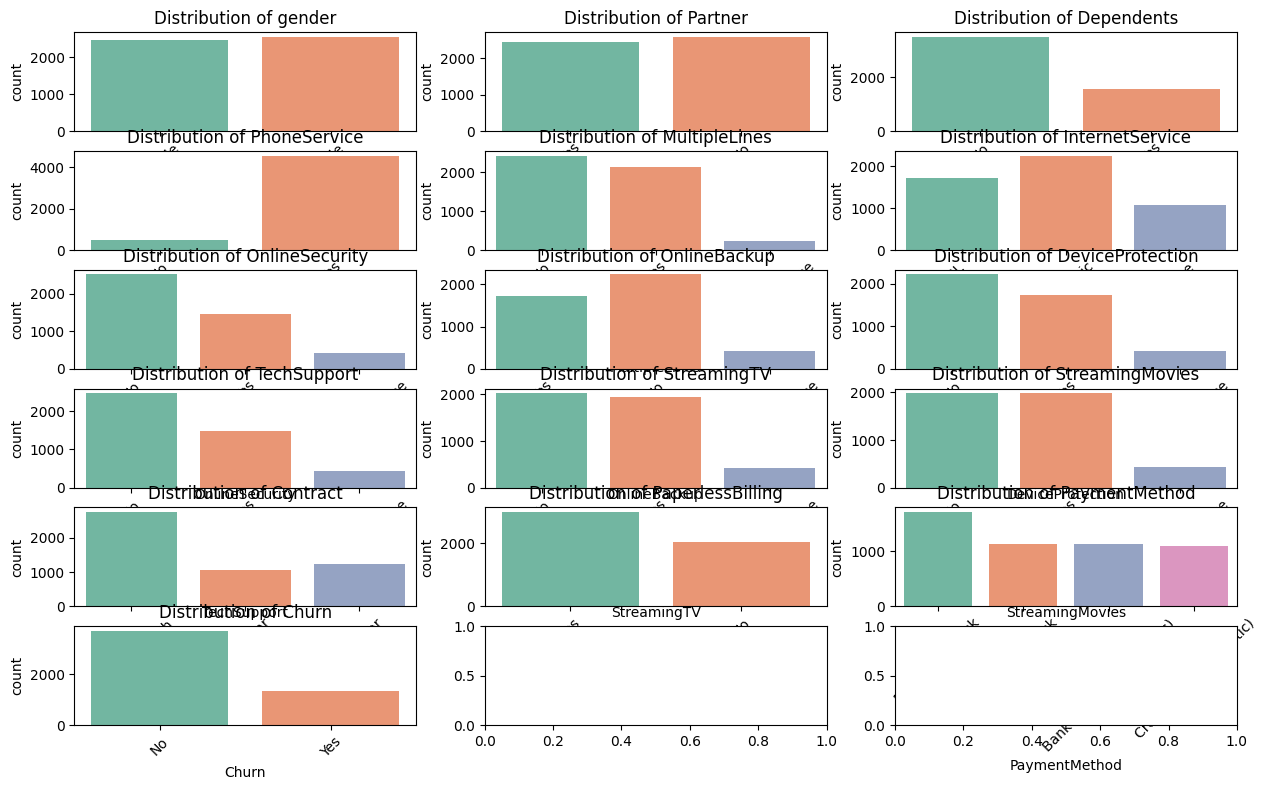

In [54]:
# Extracting categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate the number of rows needed to display all plots
num_cols = 3
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols

# Set the size of each visual
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 9))

# Flatten axes if there's only one row
if num_rows == 1:
    axes = [axes]

# Loop through categorical columns for visualization
for ax, column in zip(axes.flatten(), categorical_columns):
    sns.countplot(x=column, data=df, palette='Set2', ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


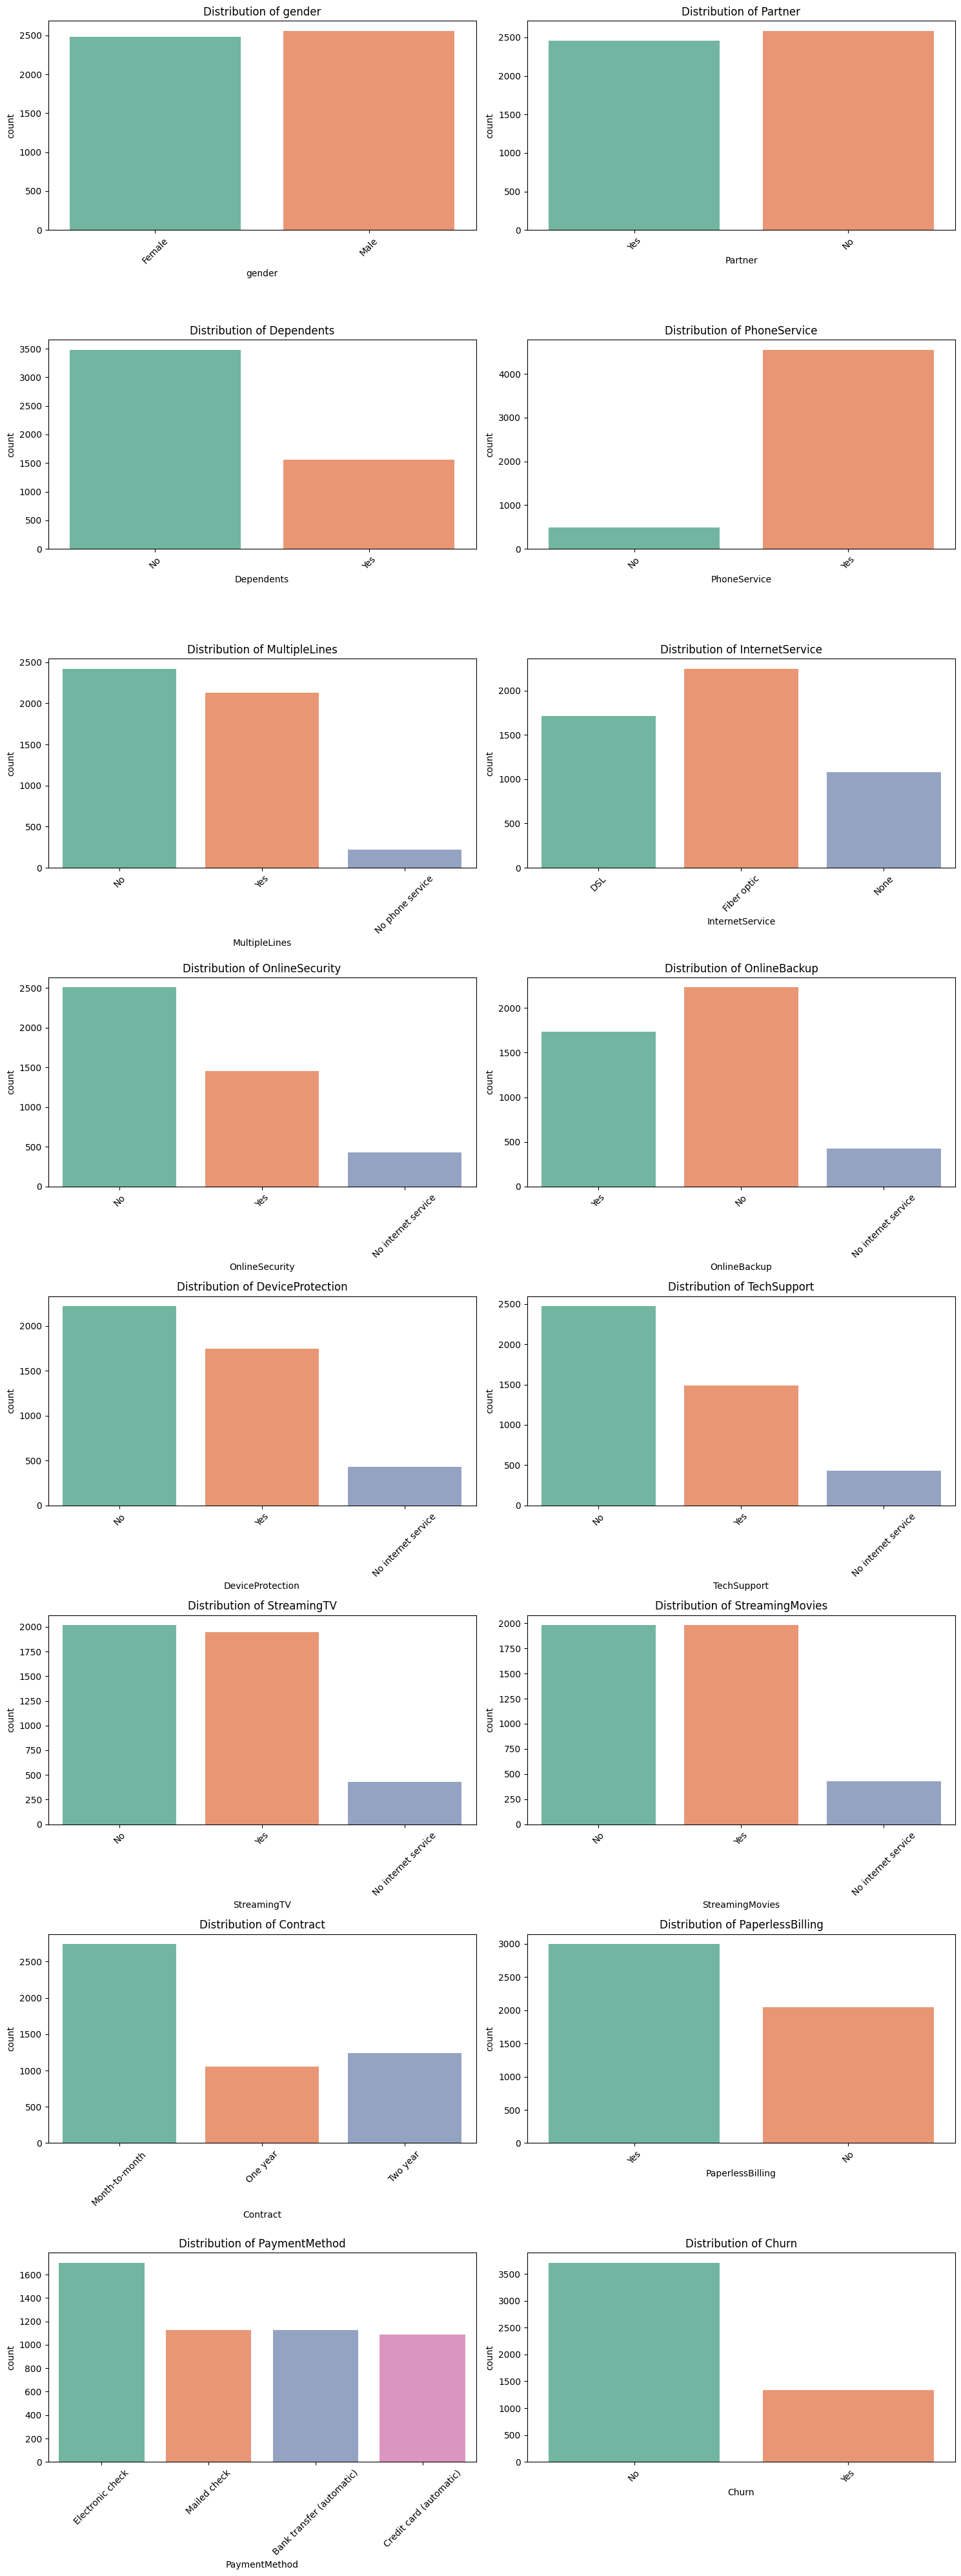

In [56]:
# Extracting categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate the number of rows needed to display all plots
num_cols = 2
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols

# Set the size of each visual
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten axes if there's only one row
if num_rows == 1:
    axes = [axes]

# Loop through categorical columns for visualization
for ax, column in zip(axes.flatten(), categorical_columns):
    sns.countplot(x=column, data=df, palette='Set2', ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


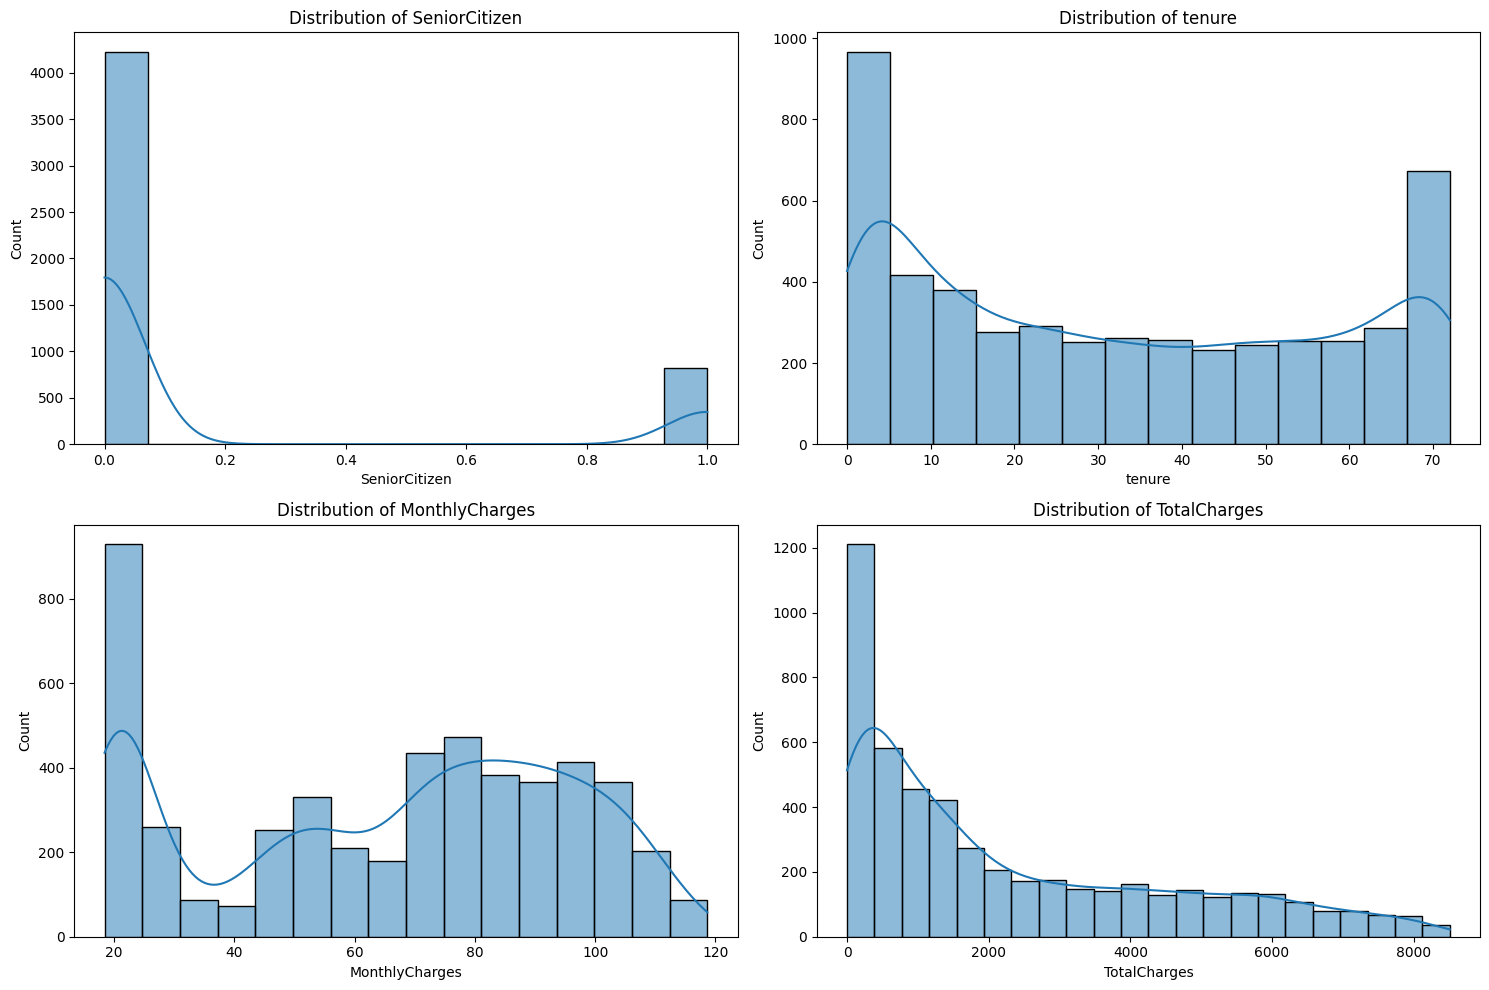

In [58]:
# Extracting numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows needed to display all plots
num_cols = 2
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

# Set the size of each visual
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten axes if there's only one row
if num_rows == 1:
    axes = [axes]

# Loop through numerical columns for visualization
for ax, column in zip(axes.flatten(), numerical_columns):
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

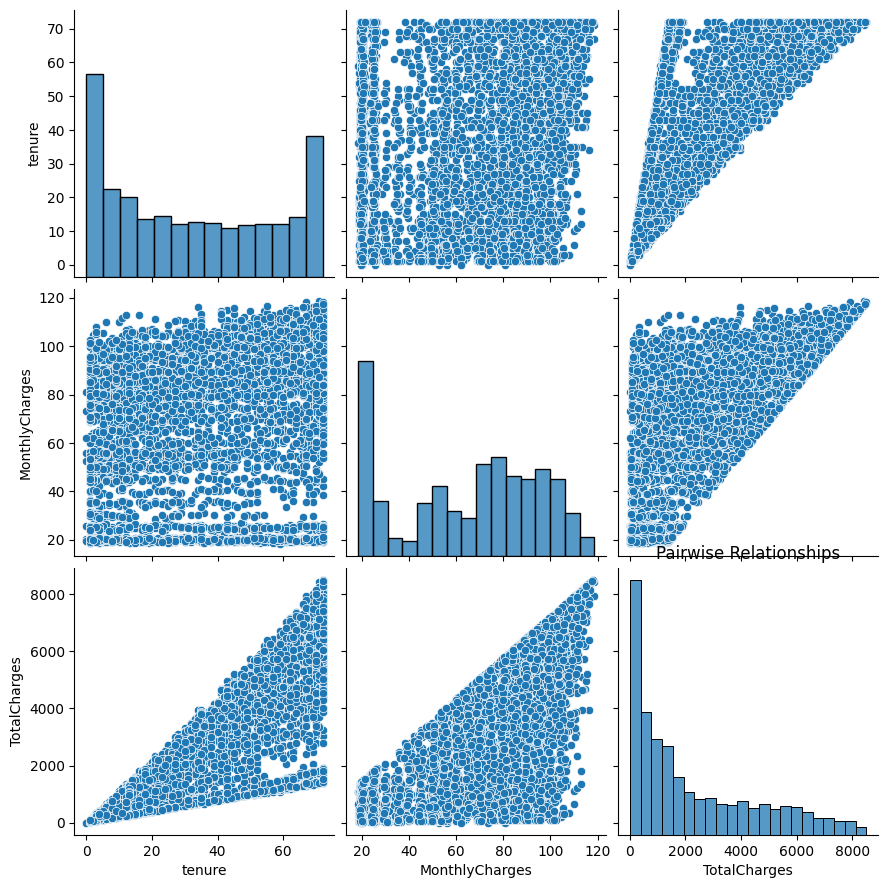

In [61]:
# Pairwise scatter plots
plt.figure(figsize=(15, 10))
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges']], height=3)
plt.title('Pairwise Relationships')
plt.show()


In [ ]:
# Box plots for numerical variables against categorical variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Contract Type')
plt.show()

# Repeat this process for other numerical variables against categorical variables


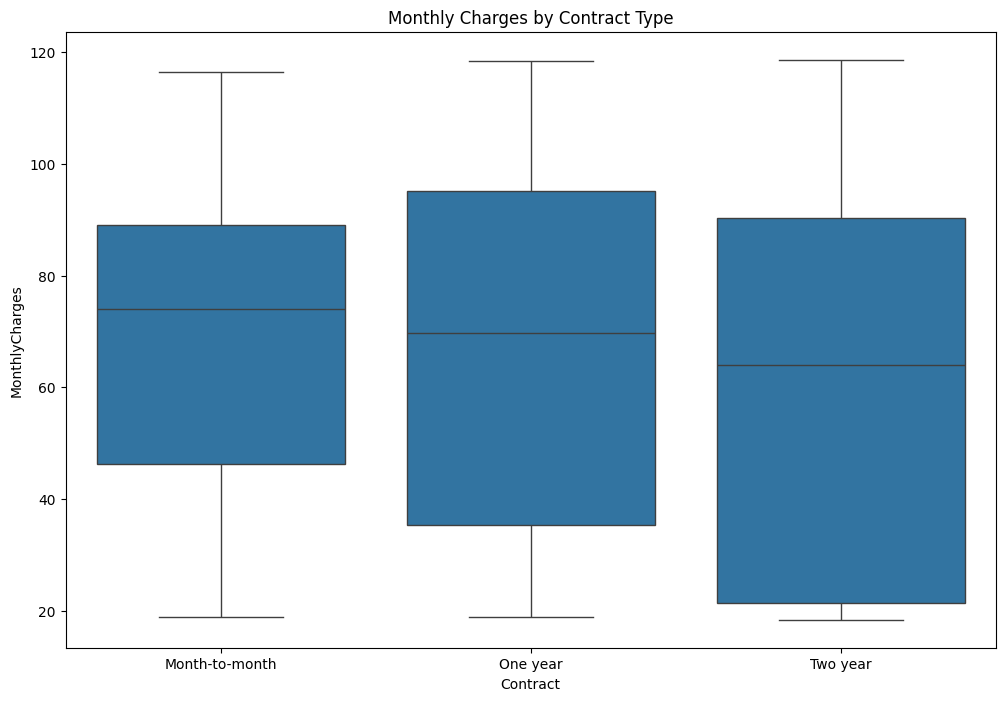

In [63]:
# Box plots for numerical variables against categorical variables
plt.figure(figsize=(12, 8))
sns.boxplot(x='Contract', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Contract Type')
plt.show()

# Repeat this process for other numerical variables against categorical variables


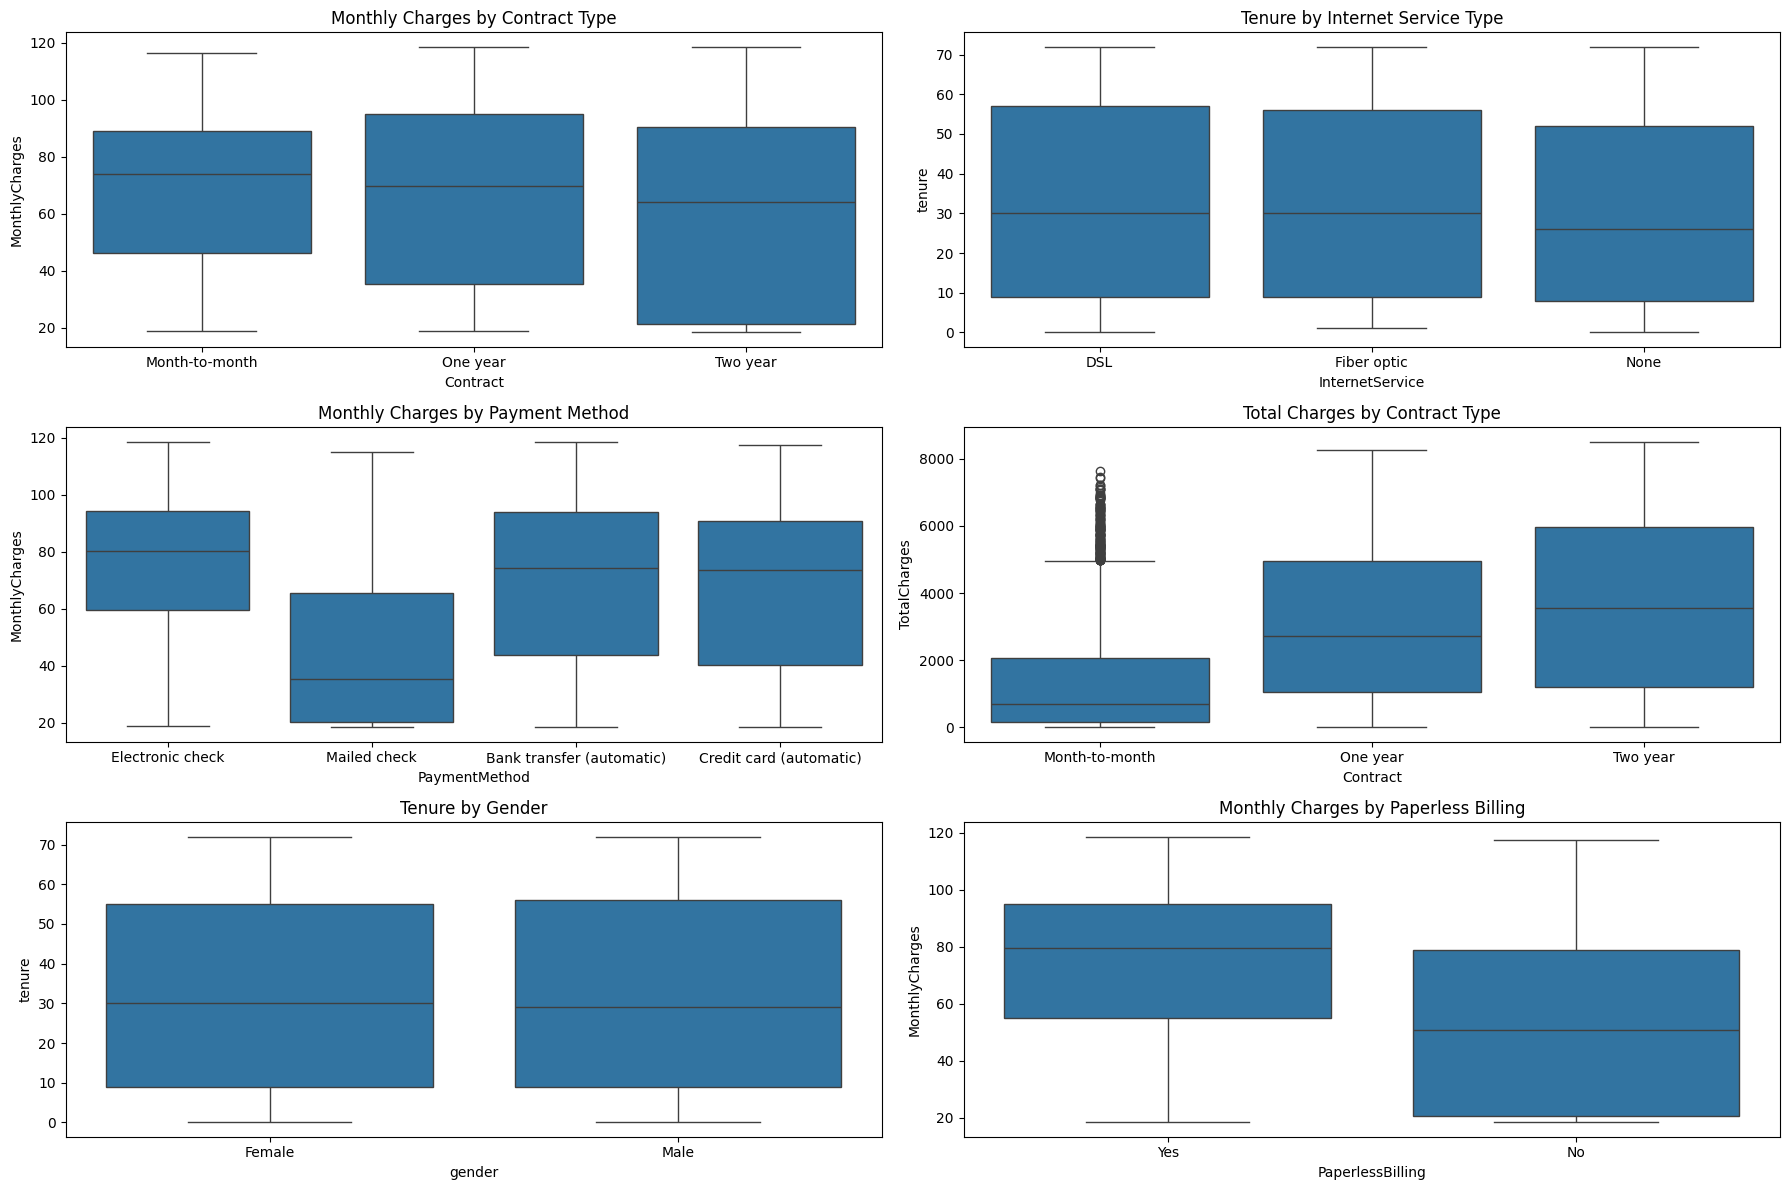

In [65]:
# Box plots for numerical variables against categorical variables

# Plot 1: Monthly Charges by Contract Type
plt.figure(figsize=(18, 12))
plt.subplot(3, 2, 1)
sns.boxplot(x='Contract', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Contract Type')

# Plot 2: Tenure by Internet Service Type
plt.subplot(3, 2, 2)
sns.boxplot(x='InternetService', y='tenure', data=df)
plt.title('Tenure by Internet Service Type')

# Plot 3: Monthly Charges by Payment Method
plt.subplot(3, 2, 3)
sns.boxplot(x='PaymentMethod', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Payment Method')

# Plot 4: Total Charges by Contract Type
plt.subplot(3, 2, 4)
sns.boxplot(x='Contract', y='TotalCharges', data=df)
plt.title('Total Charges by Contract Type')

# Plot 5: Tenure by Gender
plt.subplot(3, 2, 5)
sns.boxplot(x='gender', y='tenure', data=df)
plt.title('Tenure by Gender')

# Plot 6: Monthly Charges by Paperless Billing
plt.subplot(3, 2, 6)
sns.boxplot(x='PaperlessBilling', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Paperless Billing')

plt.tight_layout()
plt.show()


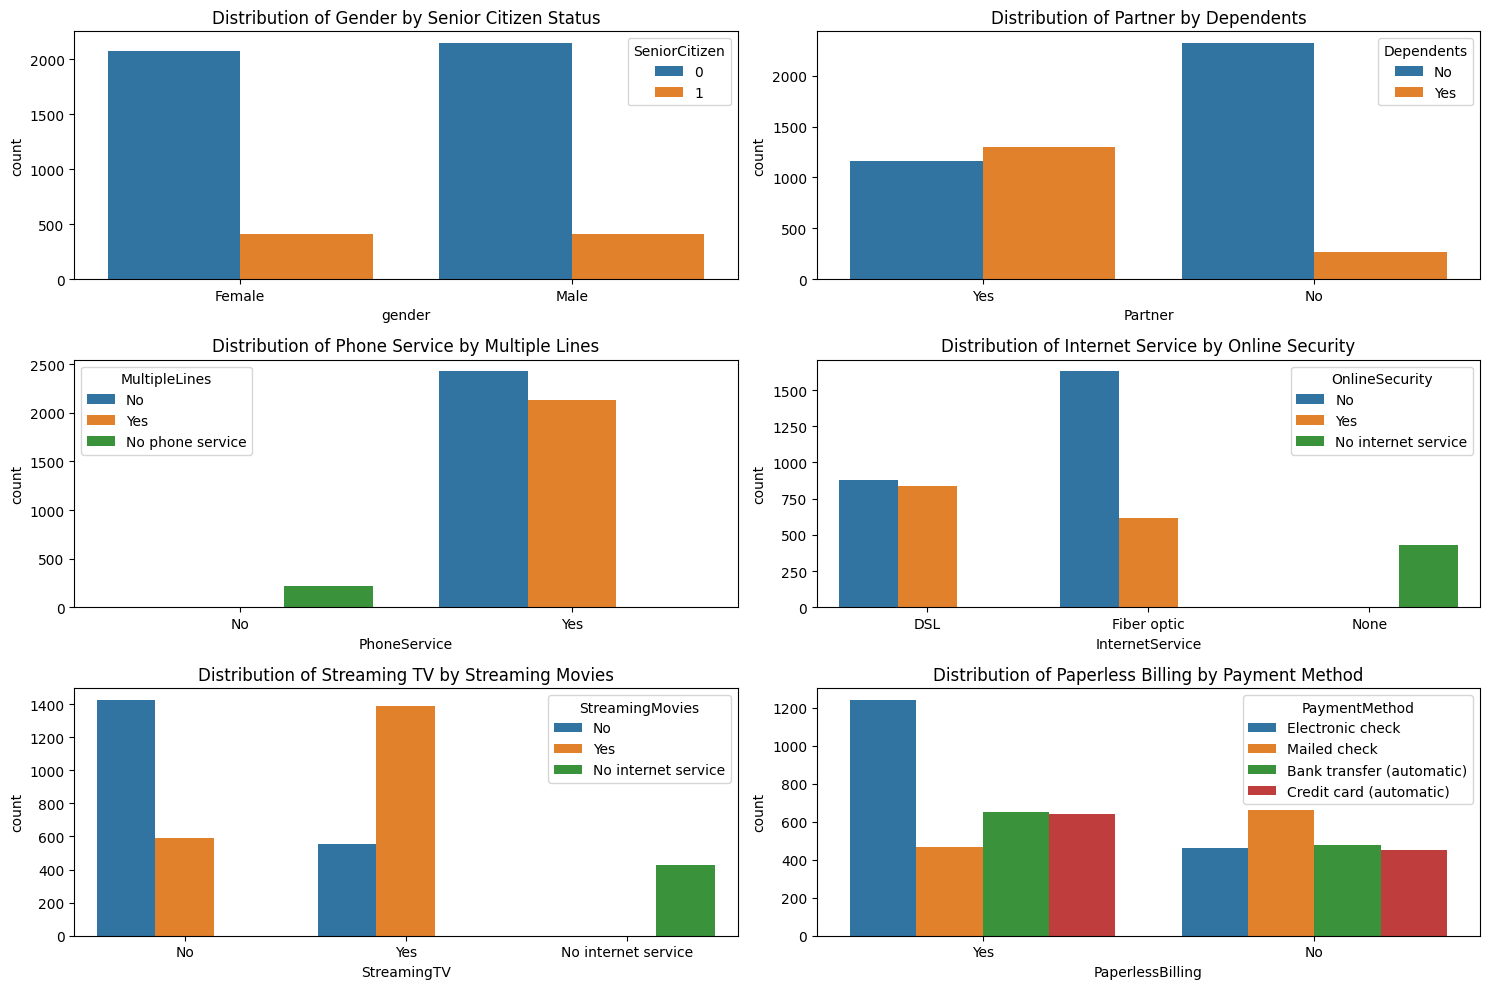

In [66]:
# Stacked bar plots for categorical variables against other categorical variables

# Plot 1: Gender by Senior Citizen Status
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.countplot(x='gender', hue='SeniorCitizen', data=df)
plt.title('Distribution of Gender by Senior Citizen Status')

# Plot 2: Partner by Dependents
plt.subplot(3, 2, 2)
sns.countplot(x='Partner', hue='Dependents', data=df)
plt.title('Distribution of Partner by Dependents')

# Plot 3: Phone Service by Multiple Lines
plt.subplot(3, 2, 3)
sns.countplot(x='PhoneService', hue='MultipleLines', data=df)
plt.title('Distribution of Phone Service by Multiple Lines')

# Plot 4: Internet Service by Online Security
plt.subplot(3, 2, 4)
sns.countplot(x='InternetService', hue='OnlineSecurity', data=df)
plt.title('Distribution of Internet Service by Online Security')

# Plot 5: Streaming TV by Streaming Movies
plt.subplot(3, 2, 5)
sns.countplot(x='StreamingTV', hue='StreamingMovies', data=df)
plt.title('Distribution of Streaming TV by Streaming Movies')

# Plot 6: Paperless Billing by Payment Method
plt.subplot(3, 2, 6)
sns.countplot(x='PaperlessBilling', hue='PaymentMethod', data=df)
plt.title('Distribution of Paperless Billing by Payment Method')

plt.tight_layout()
plt.show()


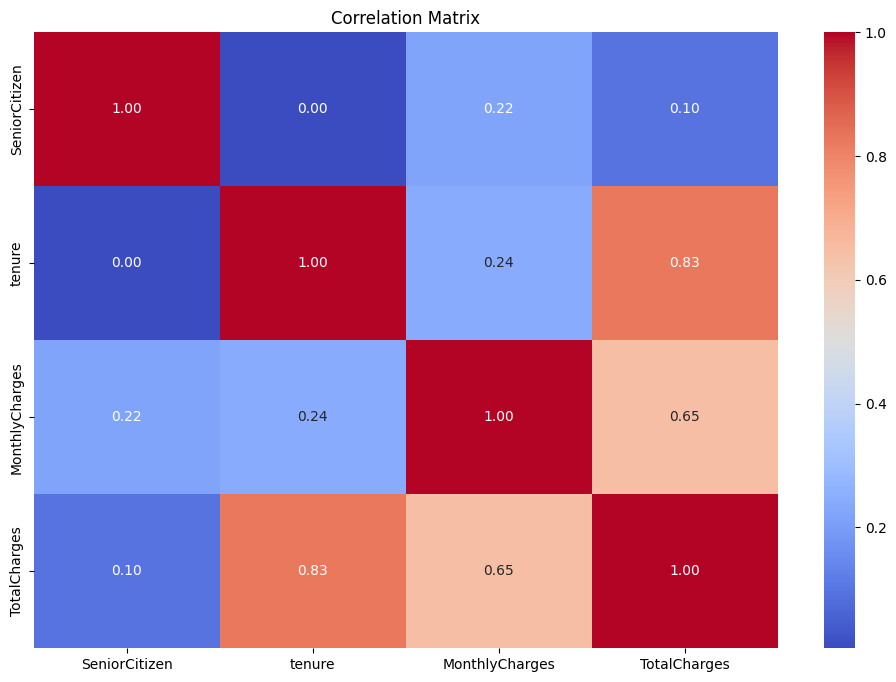

In [69]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [70]:
# Calculate skewness for numerical variables
df[numerical_columns].skew()



SeniorCitizen     1.831228
tenure            0.225132
MonthlyCharges   -0.238767
TotalCharges      0.942971
dtype: float64

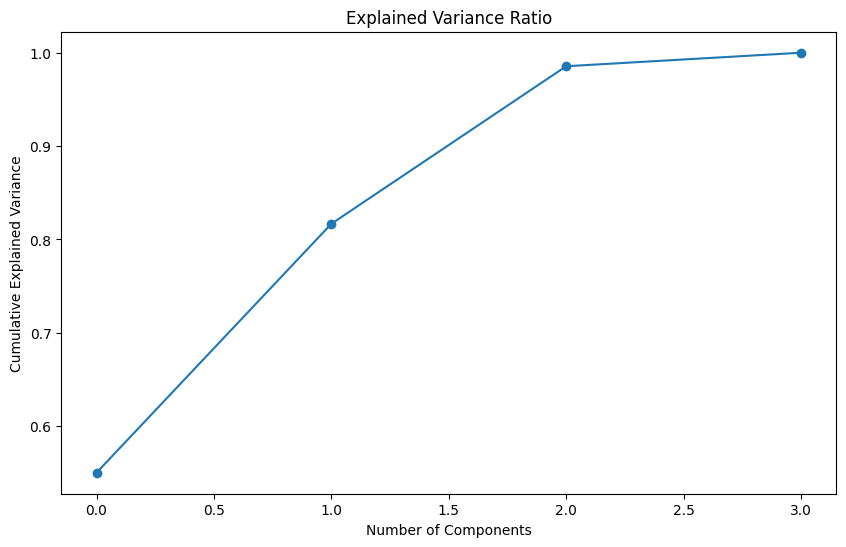

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Extract numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define X as the feature matrix
X = df[numerical_columns]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Visualize the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()


ANALYTICAL QUESTION

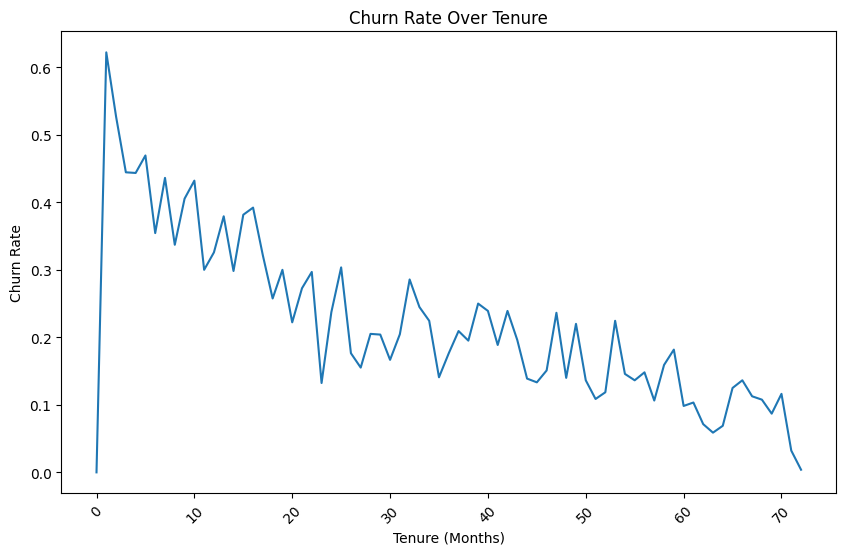

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame called df with columns 'Churn' and 'tenure'

# Map 'Yes' to 1 and 'No' to 0 in the 'Churn' column
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Calculate churn rate for each tenure
churn_rate_over_tenure = df.groupby('tenure')['Churn'].mean()

# Visualize churn rate over tenure
plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_rate_over_tenure)
plt.title('Churn Rate Over Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


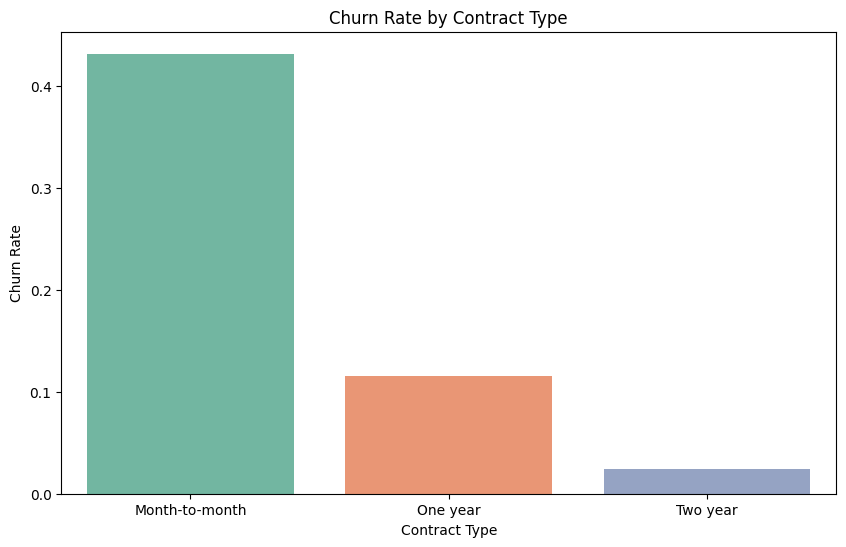

In [79]:
# Calculate churn rate for each contract type
churn_rate_by_contract = df.groupby('Contract')['Churn'].mean().reset_index()

# Visualize churn rate distribution among different contract types
plt.figure(figsize=(10, 6))
sns.barplot(x='Contract', y='Churn', data=churn_rate_by_contract, palette='Set2')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


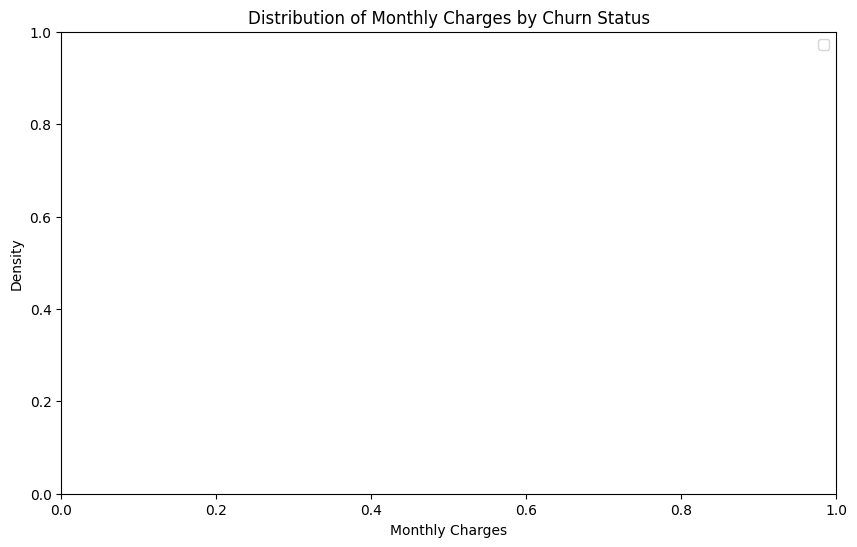

In [80]:
# Separate the dataset into churned and not churned groups
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Visualize the distribution of monthly charges for both groups using KDE plots
plt.figure(figsize=(10, 6))
sns.histplot(churned['MonthlyCharges'], kde=True, label='Churned', color='red', alpha=0.5)
sns.histplot(not_churned['MonthlyCharges'], kde=True, label='Not Churned', color='blue', alpha=0.5)
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()


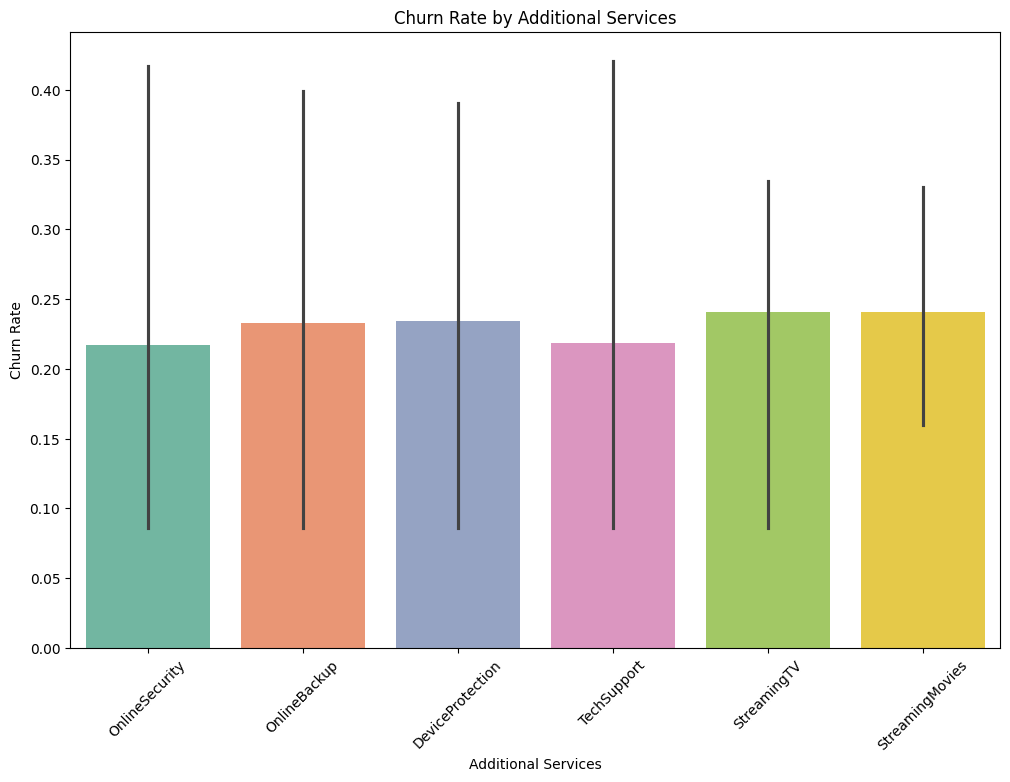

In [81]:
# List of additional services columns
additional_services_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Calculate churn rate for each additional service
churn_rates = {}
for column in additional_services_columns:
    churn_rates[column] = df.groupby(column)['Churn'].mean()

# Convert churn rates to DataFrame for easier plotting
churn_rates_df = pd.DataFrame(churn_rates)

# Plot the churn rate distribution for different additional services
plt.figure(figsize=(12, 8))
sns.barplot(data=churn_rates_df, palette='Set2')
plt.title('Churn Rate by Additional Services')
plt.xlabel('Additional Services')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


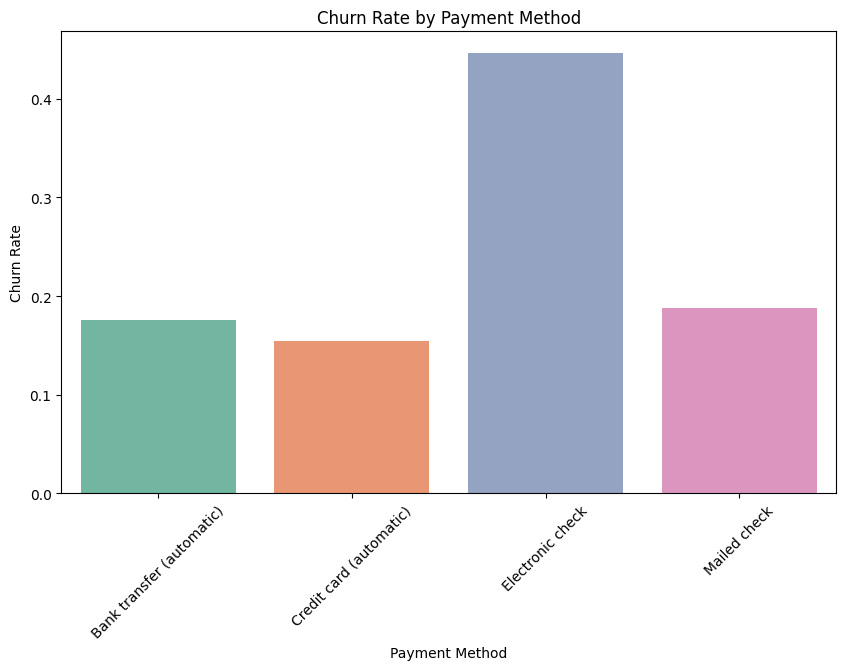

In [82]:
# Calculate churn rate for each payment method
churn_rates = df.groupby('PaymentMethod')['Churn'].mean()

# Plot the churn rate distribution for different payment methods
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='Set2')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


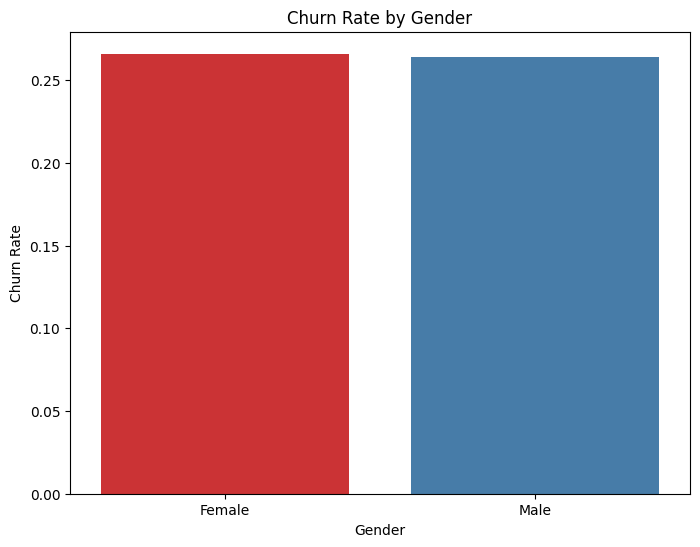

In [83]:
# Calculate churn rate for each gender
churn_rates = df.groupby('gender')['Churn'].mean()

# Plot the churn rate distribution for male and female customers
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='Set1')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()


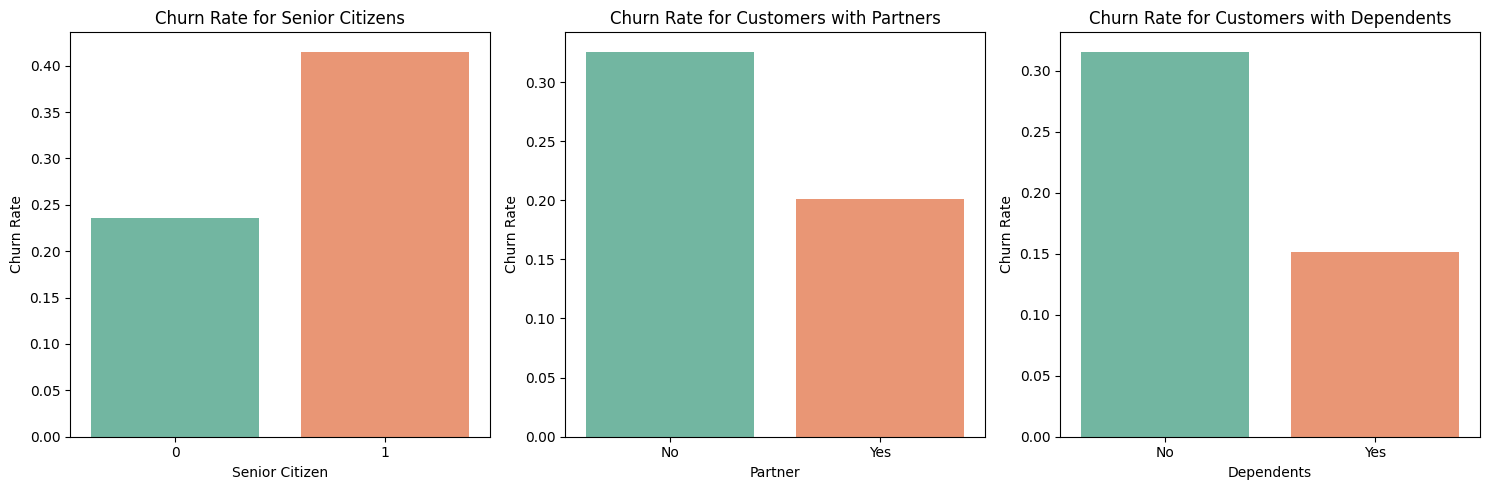

In [84]:
# Calculate churn rate for senior citizens
senior_churn_rate = df.groupby('SeniorCitizen')['Churn'].mean()

# Calculate churn rate for customers with partners
partner_churn_rate = df.groupby('Partner')['Churn'].mean()

# Calculate churn rate for customers with dependents
dependents_churn_rate = df.groupby('Dependents')['Churn'].mean()

# Plot the churn rate distribution for each demographic
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=senior_churn_rate.index, y=senior_churn_rate.values, palette='Set2')
plt.title('Churn Rate for Senior Citizens')
plt.xlabel('Senior Citizen')
plt.ylabel('Churn Rate')

plt.subplot(1, 3, 2)
sns.barplot(x=partner_churn_rate.index, y=partner_churn_rate.values, palette='Set2')
plt.title('Churn Rate for Customers with Partners')
plt.xlabel('Partner')
plt.ylabel('Churn Rate')

plt.subplot(1, 3, 3)
sns.barplot(x=dependents_churn_rate.index, y=dependents_churn_rate.values, palette='Set2')
plt.title('Churn Rate for Customers with Dependents')
plt.xlabel('Dependents')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()


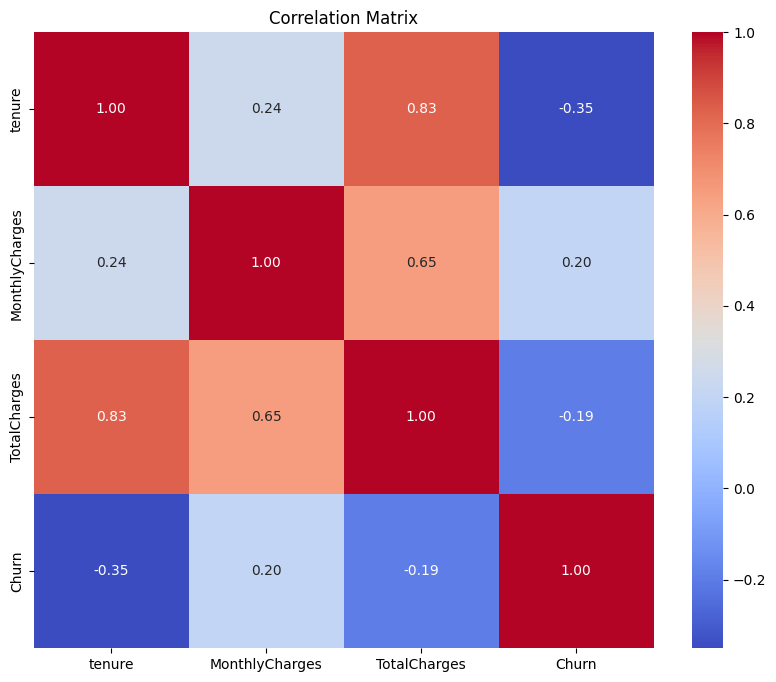

In [85]:
# Select numeric features and target variable
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Create a correlation matrix
correlation_matrix = df[numeric_features].corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [88]:
# Convert numeric values back to categorical (Yes/No)
df['Churn'] = df['Churn'].map({1: 'Yes', 0: 'No'})


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [ ]:
# Save DataFrame to a CSV file
df.to_csv('../datasets/raw_datasets/df.csv', index=False)


### Data Preparation

- #### Check Balance of Target Class

In [43]:
#call datasets to be used
df = pd.read_csv('../datasets/raw_datasets/df.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1936.30,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,Yes
3,Male,0,No,No,45,No,NaN,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1903.50,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.40,Yes


In [44]:
class_disTarg = df['Churn'].value_counts().rename('Total').reset_index()
class_disTarg

,Churn,Total
0,No,3706
1,Yes,1336


In [46]:
class_disTarg['Ratio'] = class_disTarg['Total'].apply(lambda x: round((x/class_disTarg['Total'].sum()*100), 2))
class_disTarg

,Churn,Total,Ratio
0,No,3706,73.5
1,Yes,1336,26.5


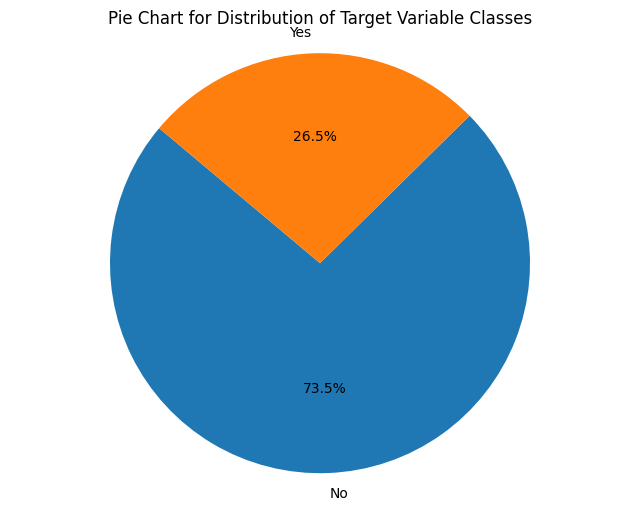

In [47]:
#plotting the ration

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_disTarg['Ratio'], labels=class_disTarg.Churn, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Pie Chart for Distribution of Target Variable Classes')
plt.show()

* Visually , it is seen the data is imbalanced


#### split data into Training and Evaluation

* X= input_data
* y= label

In [48]:
X = df.drop(['Churn'], axis=1)
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   3963 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [21]:
y=df['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
5038     No
5039     No
5040     No
5041    Yes
5042     No
Name: Churn, Length: 5043, dtype: object

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [37]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=42 )

encoding y values

In [42]:
# Drop rows with missing target values
X_train.dropna(subset=['y'], inplace=True)
X_test.dropna(subset=['y'], inplace=True)
y_train.dropna(inplace=True)
y_test.dropna(inplace=True)

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the target variable (y) for both training and testing sets
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now you can proceed with training your model using the encoded labels



KeyError: ['y']

In [38]:
y.unique()

array(['No', 'Yes', nan], dtype=object)

* import test dataset

In [30]:
df_test=pd.read_csv('../datasets/test_dataset/df_test.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   3963 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


### Preprocessing

Impute missing values

In [ ]:
# for X_train
X_train_num = x_.select_dtypes(include=['int', 'float']).columns.tolist()


In [ ]:
from sklearn.impute import SimpleImputer

# Define an imputer strategy (e.g., replacing missing values with the mean)
imputer = SimpleImputer(strategy='mean')

# Apply imputation to the training dataset
X_train_imputed = imputer.fit_transform(X_train)

# Apply the same imputation to the testing dataset
X_test_imputed = imputer.transform(X_test)


#### checking to see if the test and train dataframes have same columns

In [31]:
# Check if the column names are the same
if set(df.columns) == set(df_test.columns):
    print("The datasets have the same columns.")
else:
    print("The datasets do not have the same columns.")


The datasets do not have the same columns.


In [32]:

# Find the columns that are only in df_test
columns_only_in_df = set(df.columns) - set(df_test.columns)

# Find the columns that are only in df2
columns_only_in_df_test = set(df_test.columns) - set(df.columns)

# Print the differing columns
print("Columns only in train df:", columns_only_in_df)
print("Columns only in test df:", columns_only_in_df_test)


Columns only in train df: {'Churn'}
Columns only in test df: {'customerID'}


In [33]:
df_test = df_test.drop('customerID', axis=1)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2000 non-null   object 
 1   SeniorCitizen     2000 non-null   int64  
 2   Partner           2000 non-null   object 
 3   Dependents        2000 non-null   object 
 4   tenure            2000 non-null   int64  
 5   PhoneService      2000 non-null   object 
 6   MultipleLines     2000 non-null   object 
 7   InternetService   2000 non-null   object 
 8   OnlineSecurity    2000 non-null   object 
 9   OnlineBackup      2000 non-null   object 
 10  DeviceProtection  2000 non-null   object 
 11  TechSupport       2000 non-null   object 
 12  StreamingTV       2000 non-null   object 
 13  StreamingMovies   2000 non-null   object 
 14  Contract          2000 non-null   object 
 15  PaperlessBilling  2000 non-null   object 
 16  PaymentMethod     2000 non-null   object 
